In [166]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# for the plots
import seaborn as sns


# for correlation
import scipy.stats


In [94]:
# open the ibtracs data file

#dataDir  = '~/work/data/data100/data/ibtracs/'
#filename = dataDir + 'IBTrACS.since1980.v04r00.nc'


# if your ibtracs file is in the same direactory as this code:
filename = 'IBTrACS.since1980.v04r00.nc'

ds = xr.open_dataset(filename)



In [173]:
# define the two basins
# list of basins:
# EP=East_Pacific NA=North_Atlantic NI=North_Indian 
# SA=South_Atlantic SI=South_Indian SP=South_Pacific WP=Western_Pacific


basinA = 'NA'
basinB = 'EP'


In [193]:
datesA = ds.basin[:,0].time[ds.basin[:,0]==str.encode(basinA)]
numobs = ds.numobs[ds.basin[:,0]==str.encode(basinA)]
# at least 8 obs needed per storm to avoid counting really short lived systems
datesA = datesA.where(numobs>8,drop=True)


datesB = ds.basin[:,0].time[ds.basin[:,0]==str.encode(basinB)]
numobs = ds.numobs[ds.basin[:,0]==str.encode(basinB)]
# at least 8 obs needed per storm to avoid counting really short lived systems
datesB = datesB.where(numobs>8,drop=True)



# now lets count the number of storms per year in each basin
countA = datesA.time.groupby(datesA.time.dt.year).count()
countB = datesB.time.groupby(datesB.time.dt.year).count()

# convert to pandas dataframe
df = countA.to_dataframe(name=basinA)
df[basinB]=countB


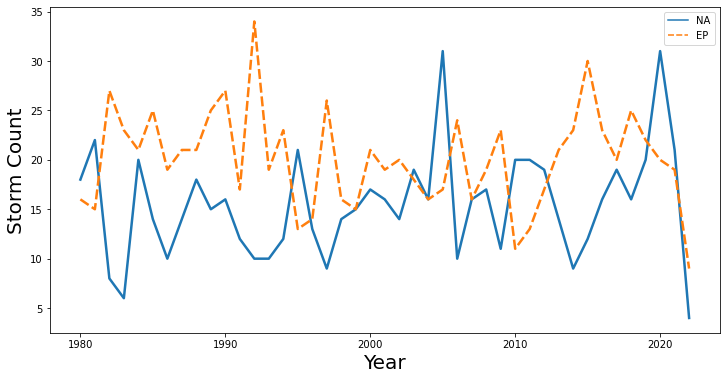

In [194]:
# now we can plot time series of the storm count for both basins
# we will use seaborn


plt.figure(figsize=(12,6))
ax=sns.lineplot(data=df, palette="tab10", linewidth=2.5)

ax.set_ylabel("Storm Count",fontsize=20) 
ax.set_xlabel("Year",fontsize=20) 
plt.legend()

In [195]:
# Correlate the two time series

print (' ----------------------------------------------------------------------------------- ')
r, pval = scipy.stats.pearsonr(df[basinA],df[basinB]) 
print("Correlation pearson)  between the two basins (r) = " , r)
print ("P value = ",pval)


 ----------------------------------------------------------------------------------- 
Correlation pearson)  between the two basins (r) =  -0.29398763701460334
P value =  0.05568108488330293


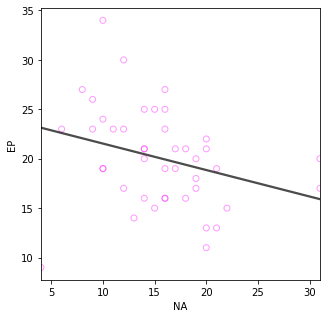

In [205]:
plt.figure(figsize=(5,5))

p1=sns.regplot(data=df, x=df[basinA], y=df[basinB], lowess=False, scatter_kws={'facecolors':'none', 'alpha':0.4, 'edgecolor':"magenta"}, line_kws={'color': "black", 'alpha':.7}, ci=None )